In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 50
np.random.seed(SEED)

In [3]:
def generate_data(num_samples):
    X = np.arange(num_samples)
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5 * X + random_noise
    return X, y

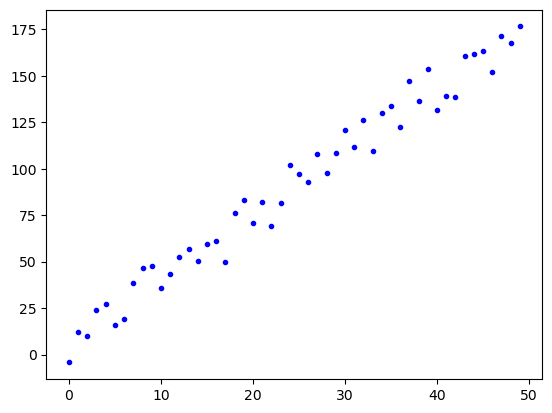

In [4]:
X, y = generate_data(NUM_SAMPLES)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values

plt.plot(X, y, 'b.')

In [5]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# split data
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

X_train = X[train_start: train_end]
y_train = y[train_start: train_end]
X_val = X[val_start: val_end]
y_val = y[val_start: val_end]
X_test = X[test_start:]
y_test = y[test_start:]

In [6]:
# standardize data (z_score = (X_i - mu) / std)

def standardize_data(data, mean, std):
    return (data - mean)/std

# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val   = standardize_data(X_val, X_mean, X_std)
y_val   = standardize_data(y_val, y_mean, y_std)
X_test  = standardize_data(X_test, X_mean, X_std)
y_test  = standardize_data(y_test, y_mean, y_std)

In [7]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [8]:
# initialize random weights 
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM) 
b = np.zeros((1,1))
W.shape, b.shape

((1, 1), (1, 1))

In [9]:
y_pred = np.dot(X_train, W) + b
y_pred.shape

(35, 1)

In [10]:
# Loss function: MSE

N = len(y_pred)
loss = 1/N * np.sum((y_train - y_pred)**2)

print(loss)

0.9861645032469716


In [11]:
# Gradients

dW = (2/N) * np.sum((y_pred - y_train) * X_train)
db = (2/N) * np.sum((y_pred - y_train))

In [12]:
# Update Weights

alpha = 0.1
W = W - alpha * dW
b = b - alpha * db

In [13]:
# Training

epochs = 100

W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,))
alpha = 0.1


for epoch in range(epochs):
    y_pred = np.dot(X_train, W) + b

    loss = 1/len(y_train) * np.sum((y_pred - y_train)**2)

    if epoch%10 == 0:
        print(f"Epoch: {epoch}, loss: {loss:.3f}")

    dW = (2/N) * np.sum((y_pred - y_train) * X_train)
    db = (2/N) * np.sum((y_pred - y_train))

    W = W - alpha * dW
    b = b - alpha * db

Epoch: 0, loss: 0.990
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.028
Epoch: 30, loss: 0.028
Epoch: 40, loss: 0.028
Epoch: 50, loss: 0.028
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.028
Epoch: 80, loss: 0.028
Epoch: 90, loss: 0.028


In [14]:
# Evaluation

pred_train = W*X_train + b
pred_test  = W*X_test + b

In [15]:
# Train and Test MSE 

train_mse = np.mean((y_train - pred_train) ** 2)
test_mse  = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.01


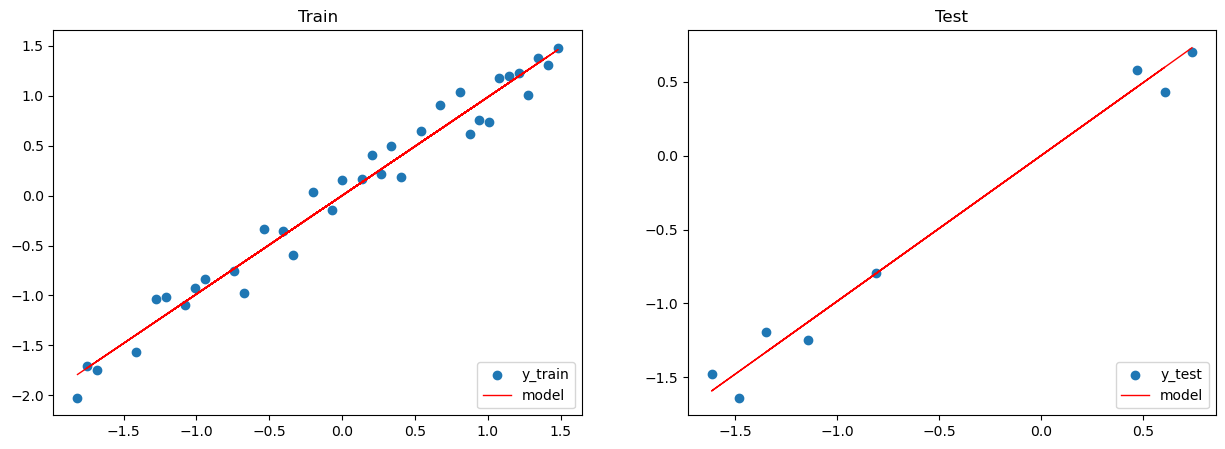

In [16]:
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [97]:
diabetes = load_diabetes()
lin_reg = LinearRegression()
scaler = StandardScaler()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [69]:
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [70]:
# get all the features in X 
# get target in y
# split train test 


X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((353, 10), (89, 10))

In [71]:
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
]

pipeline = Pipeline(pipeline_steps)

In [98]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [101]:
lin_reg.score(X_test, y_test)

0.4526066021617383

In [102]:

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

mse, r2

(2900.17328788323, 0.4526066021617383)

In [103]:
test_values =  pd.DataFrame([{
    "age": 40,
    "sex": 1,
    "bmi": 27.5,
    "bp": 85,
    "s1": 200,
    "s2": 130,
    "s3": 50,
    "s4": 4.0,
    "s5": 4.6,
    "s6": 90
}])

scaled_data = scaler.fit_transform(test_values)
y_pred = lin_reg.predict(scaled_data)
y_pred

c:\Users\108pa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([151.34565535])

In [104]:
from sklearn.linear_model import ElasticNet, Lasso

In [105]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict(scaled_data)

c:\Users\108pa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([152.13348416])

In [106]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict(scaled_data)

c:\Users\108pa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


array([152.13348416])